In [2]:
import torch
from torchvision import models

resnet = models.resnet18(pretrained=True)

resnet

/home/roach/torch-study/.venv/lib/python3.13/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/roach/torch-study/.venv/lib/python3.13/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
2.5%

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /home/roach/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100.0%


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [12]:
from torchvision import transforms

preprocess = transforms.Compose([
    transforms.Lambda(lambda img: img.convert('RGB') if img.mode == 'RGBA' else img),
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]), # 지정된 평균과 표준편차를 가지도록 정규화
])

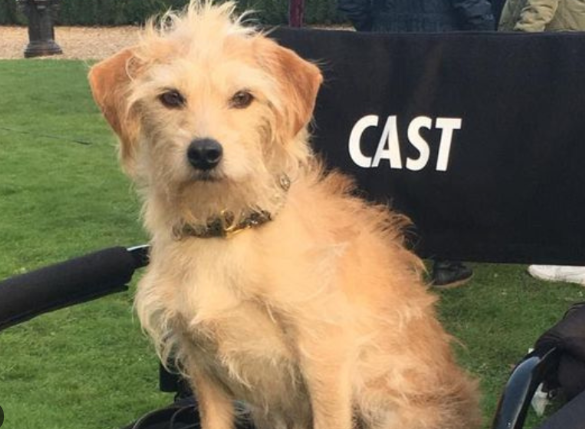

In [13]:
from PIL import Image

img = Image.open("./bobby.png")
img

In [14]:
img_t = preprocess(img)

In [15]:
batch_t = torch.unsqueeze(img_t, 0)

In [16]:
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [17]:
out = resnet(batch_t)
out

tensor([[ 1.2657, -0.6512, -0.5244, -2.4777, -0.7679,  0.2168, -1.6498, -1.2999,
         -0.0168, -1.6997, -2.7691, -1.0066, -1.6045, -4.7758, -2.5939, -2.3079,
         -2.9977, -3.3675, -3.4666, -1.6222, -3.9246, -0.5785, -2.0509, -2.7008,
         -2.4120, -0.6530, -1.5554, -2.8785, -2.4179, -1.1801, -3.5952, -4.3441,
         -1.9300,  1.5561,  0.5085, -0.6498, -0.5877, -3.4534, -1.4388, -1.2965,
         -4.4030, -2.4490, -2.5458, -2.4254, -1.5057,  0.0589, -3.8619, -0.7411,
         -2.1828, -2.1481, -1.4240, -1.2808, -0.8949, -1.4517, -0.8465, -1.6859,
         -1.0388, -2.6438, -0.3034, -2.6093,  0.2253, -0.9783, -0.7189,  0.0127,
          0.1419,  0.2543, -0.4897, -1.0890, -0.0686, -2.3830, -2.1743, -1.1213,
         -1.8167, -0.4690, -1.4318, -3.2368, -1.5494, -3.9559, -0.4709, -0.6480,
         -1.4456, -4.0062, -2.7853, -1.7439, -4.0798, -2.2533, -0.7956, -0.8851,
         -1.4123, -1.9916, -4.0683, -0.8918, -1.9455, -2.7401, -2.5346, -2.6278,
         -1.6525, -2.8837, -

In [18]:
_, index = torch.max(out, 1)
index

tensor([185])

In [21]:
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
percentage[index[0]]

tensor(28.5311, grad_fn=<SelectBackward0>)

In [35]:
batch_t = torch.randn(2, 3, 5, 5)
batch_t.mean(-3)

tensor([[[-0.1840,  0.5958,  0.3164, -0.0350, -0.1893],
         [ 0.7138, -0.2273,  0.2598, -0.7122, -0.5443],
         [-0.5522,  0.0639, -0.3660, -0.7119, -0.6524],
         [ 0.3995,  0.7771, -0.8179,  0.3399,  1.7975],
         [-0.2041, -0.1063,  0.2674, -0.7986,  0.4470]],

        [[-0.1790,  0.3805, -0.0397, -0.7219, -0.8068],
         [-0.3940,  0.0577, -1.4453, -0.4232,  0.2477],
         [ 0.0564,  0.7947, -0.7401,  0.8394,  0.3428],
         [-0.4030, -0.0327,  0.3264, -1.3008, -0.3901],
         [-1.1265, -1.1585, -0.7137,  0.2719,  0.5541]]])

In [41]:
x = torch.tensor([
    [1.0, 2.0, 3.0],
    [4.0, 5.0, 6.0]
])

In [44]:
x.mean(dim=0).shape

torch.Size([3])

In [43]:
x.shape

torch.Size([2, 3])